Notebook usado para testar código solto.

In [1]:
from commpy.channels import awgn
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
import pyMRI.pymri as pymri
from pyMRI.utils import RMSE

In [2]:
the = np.arange(0.0, 2*np.pi, 0.1)
x = 1.0*np.cos(the)
y = 1.0*np.sin(the)


the_ = np.arctan2(y, x)

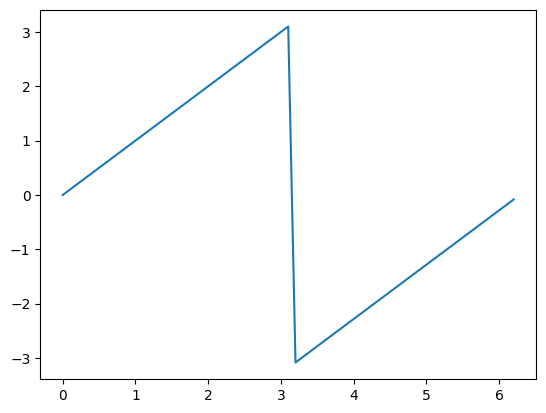

In [3]:
plt.plot(the, the_)

In [4]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws, t2s, M_0s

spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")


All frequencies are captured by the sampling rate.


In [30]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

sig_fft = sig_fft/np.nanmax(sig_fft)

c_sig_fft = awgn(sig_fft, 15)
c_sig  = np.fft.ifft(np.fft.ifftshift(c_sig_fft))

In [31]:
L = 0.4
noise_threshold = 1e-24

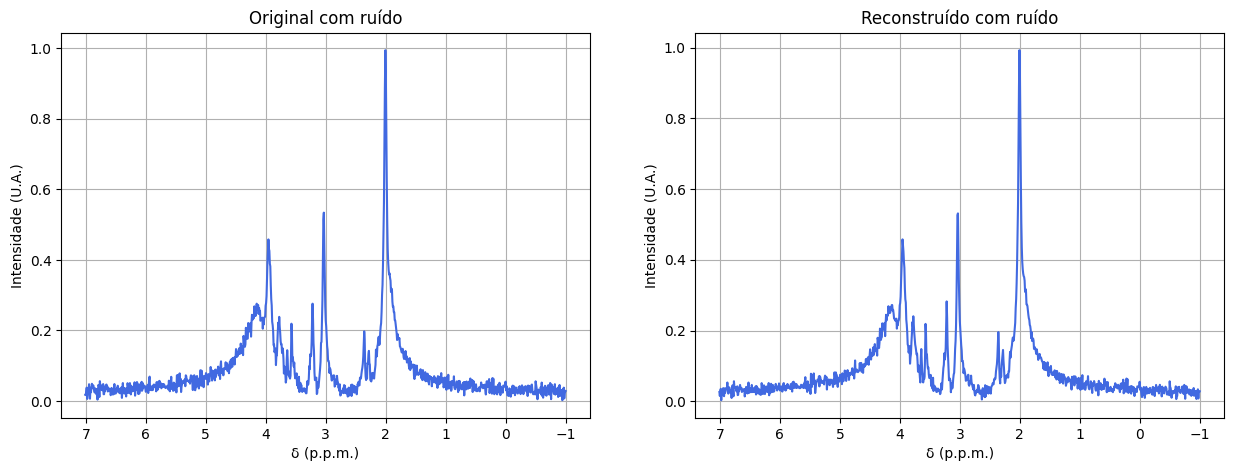

In [32]:
r_sig = pymri.filter_sig(c_sig, L, noise_threshold, rcond = 1e-24,  zero_filtering=1e-24)
freqs, r_sig_fft = pymri.fourier_spectrum(r_sig, dt, B0)

plt.figure(figsize=(15, 5))

plt.subplot(121)
pymri.plot_chem_shifts(freqs, c_sig_fft, 1.0, title = "Original com ruído", ylabel = "Intensidade (U.A.)", c = "royalblue")

plt.subplot(122)
pymri.plot_chem_shifts(freqs, r_sig_fft, 1.0, title = "Reconstruído com ruído", ylabel = "Intensidade (U.A.)", c = "royalblue")